## Credit Case Study.

#### Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1)If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2)If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1)The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

2)All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1)Approved: The Company has approved loan Application

2)Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

3)Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

4)Unused offer: Loan has been cancelled by the client but on different stages of the process.

#### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

#### Read the Data set

In [3]:
#read the data set of "application_data.csv" in inp0.
inp0= pd.read_csv('application_data.csv' )
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Data Preview

In [4]:
inp0.shape

(307511, 122)

In [5]:
#print the information of variables to check their data types.
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### Data Quality check and Missing values

In [7]:
inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
#The percentage of missing values in each columns of both the datasets.
percent_missing = inp0.isnull().sum() * 100 / len(inp0)
percent_missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

## Handling the missing values

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).

#### Approach to handle the missing values
- *Dropping the columns with missing values greater than or equal to 50%.*
- *Dropping the columns related to number of enquiries made by the customer such as
   AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_day, etc..,.*
- *Dropping the columns irrevelant to the desicion making of loan approval and rejection.*

In [9]:
inp0.drop(["OWN_CAR_AGE","EXT_SOURCE_1","APARTMENTS_AVG","BASEMENTAREA_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG","ENTRANCES_MODE","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG","LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMIN_MODE","LANDAREA_MODE","LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE","APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BUILD_MEDI","COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE"] , axis=1, inplace=True)
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0690,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.0345,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With 

In [10]:
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [11]:
inp0.drop(inp0.iloc[:,4:7], axis=1,inplace=True)
inp0.drop(inp0.iloc[:,8:9], axis=1,inplace=True)
inp0.drop(inp0.iloc[:,12:13], axis=1,inplace=True)
inp0.drop(inp0.iloc[:,16:22], axis=1,inplace=True)
inp0.drop(inp0.iloc[:,17:18], axis=1,inplace=True)
inp0.drop(inp0.iloc[:,19:27], axis=1,inplace=True)
inp0.drop(inp0.iloc[:,19:24], axis=1,inplace=True)
inp0.drop(inp0.iloc[:,19:26], axis=1,inplace=True)
inp0.drop(inp0.iloc[:,24:48], axis=1,inplace=True)
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,2,2,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,1,1,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,2,2,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2,2,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,2,2,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,Sales staff,1,1,0.0,0.0,0.0,0.0,-273.0,NaN,NaN
307507,456252,0,Cash loans,F,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,-4388.0,-4090,NaN,2,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN
307508,456253,0,Cash loans,F,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,-14966,-7921,-6737.0,-5150,Managers,3,3,6.0,0.0,6.0,0.0,-1909.0,0.0,1.0
307509,456254,1,Cash loans,F,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,Laborers,2,2,0.0,0.0,0.0,0.0,-322.0,0.0,0.0


In [12]:
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   AMT_INCOME_TOTAL             307511 non-null  float64
 5   AMT_CREDIT                   307511 non-null  float64
 6   AMT_ANNUITY                  307499 non-null  float64
 7   AMT_GOODS_PRICE              307233 non-null  float64
 8   NAME_INCOME_TYPE             307511 non-null  object 
 9   NAME_EDUCATION_TYPE          307511 non-null  object 
 10  NAME_FAMILY_STATUS           307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  DAYS_BIRTH                   307511 non-null  int64  
 13 

In [13]:
inp0.isnull().sum() 

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
dtype: int64

In [14]:
inp0.isnull().sum() * 100 / len(inp0)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DAYS_LAST_PHONE_CHANGE          0.000325
AMT_REQ_CREDIT_B

#### Reporting the columns with missing values less than 13%.
- AMT_ANNUITY:-                         0.003902

The missing values of this column can be imputed with the mode which is 9000.



- AMT_GOODS_PRICE:-                     0.090403

The missing values of this column can be imputed with the mode which is 450000.



- OBS_30_CNT_SOCIAL_CIRCLE :-           0.332021

- DEF_30_CNT_SOCIAL_CIRCLE :-           0.332021

- OBS_60_CNT_SOCIAL_CIRCLE :-           0.332021

- DEF_60_CNT_SOCIAL_CIRCLE :-           0.332021

- DAYS_LAST_PHONE_CHANGE  :-            0.000325

 The missing values of all the above remaining columns can be imputed with the use of value_counts().

In [15]:
# Handling the null values of "AMT_ANNUITY" and "AMT_GOODS_PRICE" columns by replacing null values with mode.
mode1=inp0["AMT_ANNUITY"].mode()
mode1

0    9000.0
dtype: float64

In [16]:
mode2=inp0["AMT_GOODS_PRICE"].mode()
mode2

0    450000.0
dtype: float64

In [17]:
inp0["AMT_ANNUITY"].fillna(9000, inplace=True)
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,2,2,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,1,1,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,2,2,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2,2,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,2,2,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,Sales staff,1,1,0.0,0.0,0.0,0.0,-273.0,NaN,NaN
307507,456252,0,Cash loans,F,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,-4388.0,-4090,NaN,2,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN
307508,456253,0,Cash loans,F,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,-14966,-7921,-6737.0,-5150,Managers,3,3,6.0,0.0,6.0,0.0,-1909.0,0.0,1.0
307509,456254,1,Cash loans,F,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,Laborers,2,2,0.0,0.0,0.0,0.0,-322.0,0.0,0.0


In [18]:
inp0["AMT_GOODS_PRICE"].fillna(450000, inplace=True)
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,2,2,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,1,1,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,2,2,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2,2,2.0,0.0,2.0,0.0,-617.0,NaN,NaN
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,2,2,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,Sales staff,1,1,0.0,0.0,0.0,0.0,-273.0,NaN,NaN
307507,456252,0,Cash loans,F,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,-4388.0,-4090,NaN,2,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN
307508,456253,0,Cash loans,F,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,-14966,-7921,-6737.0,-5150,Managers,3,3,6.0,0.0,6.0,0.0,-1909.0,0.0,1.0
307509,456254,1,Cash loans,F,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,Laborers,2,2,0.0,0.0,0.0,0.0,-322.0,0.0,0.0


In [19]:
#Handling the missing values of "OCCUPATION_TYPE" column.
#inp0["OCCUPATION_TYPE"].value_counts()

In [20]:
#inp0["OCCUPATION_TYPE"].fillna("Laborers", inplace=True)
#inp0

In [30]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   AMT_INCOME_TOTAL             307511 non-null  float64
 5   AMT_CREDIT                   307511 non-null  float64
 6   AMT_ANNUITY                  307511 non-null  float64
 7   AMT_GOODS_PRICE              307511 non-null  float64
 8   NAME_INCOME_TYPE             307511 non-null  object 
 9   NAME_EDUCATION_TYPE          307511 non-null  object 
 10  NAME_FAMILY_STATUS           307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  DAYS_BIRTH                   307511 non-null  float64
 13 

###### There are columns such as "DAYS_BIRTH","DAYS_EMPLOYED" , "DAYS_REGISTRATION" and "DAYS_ID_PUBLISH" have negative values in it so we change the formats into positive by using absolute values.

In [31]:
inp0.iloc[:,12:16]=abs(inp0.iloc[:,12:16])

In [32]:
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005.0,3039.0,9833.0,2437.0,Laborers,2,2,2.0,0.0,2.0,0.0,617.0,NaN,NaN
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932.0,3038.0,4311.0,3458.0,Core staff,2,2,0.0,0.0,0.0,0.0,1106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,9327.0,236.0,8456.0,1982.0,Sales staff,1,1,0.0,0.0,0.0,0.0,273.0,NaN,NaN
307507,456252,0,Cash loans,F,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,20775.0,365243.0,4388.0,4090.0,NaN,2,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN
307508,456253,0,Cash loans,F,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,14966.0,7921.0,6737.0,5150.0,Managers,3,3,6.0,0.0,6.0,0.0,1909.0,0.0,1.0
307509,456254,1,Cash loans,F,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,11961.0,4786.0,2562.0,931.0,Laborers,2,2,0.0,0.0,0.0,0.0,322.0,0.0,0.0


In [33]:
# Making the "DAYS_LAST_PHONE_CHANGE" column with positive values as it has negative values which could be possibly an error.
inp0["DAYS_LAST_PHONE_CHANGE"]=abs(inp0["DAYS_LAST_PHONE_CHANGE"])
inp0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005.0,3039.0,9833.0,2437.0,Laborers,2,2,2.0,0.0,2.0,0.0,617.0,NaN,NaN
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932.0,3038.0,4311.0,3458.0,Core staff,2,2,0.0,0.0,0.0,0.0,1106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,9327.0,236.0,8456.0,1982.0,Sales staff,1,1,0.0,0.0,0.0,0.0,273.0,NaN,NaN
307507,456252,0,Cash loans,F,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,20775.0,365243.0,4388.0,4090.0,NaN,2,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN
307508,456253,0,Cash loans,F,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,14966.0,7921.0,6737.0,5150.0,Managers,3,3,6.0,0.0,6.0,0.0,1909.0,0.0,1.0
307509,456254,1,Cash loans,F,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,11961.0,4786.0,2562.0,931.0,Laborers,2,2,0.0,0.0,0.0,0.0,322.0,0.0,0.0


### Checking the imbalance percentage using Target field.

In [34]:
inp0["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [35]:
inp0["TARGET"].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [36]:
#Partitioning
df_1=inp0[inp0["TARGET"]==1]
df_0=inp0[inp0["TARGET"]==0]

In [37]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0
26,100031,1,Cash loans,F,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,18724.0,2628.0,6573.0,1827.0,Cooking staff,3,2,10.0,1.0,10.0,0.0,161.0,2.0,2.0
40,100047,1,Cash loans,M,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,17482.0,1262.0,1182.0,1029.0,Laborers,2,2,0.0,0.0,0.0,0.0,1075.0,0.0,4.0
42,100049,1,Cash loans,F,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,13384.0,3597.0,45.0,4409.0,Sales staff,3,3,1.0,0.0,1.0,0.0,1480.0,0.0,2.0
81,100096,1,Cash loans,F,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,24794.0,365243.0,5391.0,4199.0,NaN,2,2,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [38]:
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005.0,3039.0,9833.0,2437.0,Laborers,2,2,2.0,0.0,2.0,0.0,617.0,NaN,NaN
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19932.0,3038.0,4311.0,3458.0,Core staff,2,2,0.0,0.0,0.0,0.0,1106.0,0.0,0.0
5,100008,0,Cash loans,M,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,16941.0,1588.0,4970.0,477.0,Laborers,2,2,0.0,0.0,0.0,0.0,2536.0,1.0,1.0


## Handling Outliers

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**

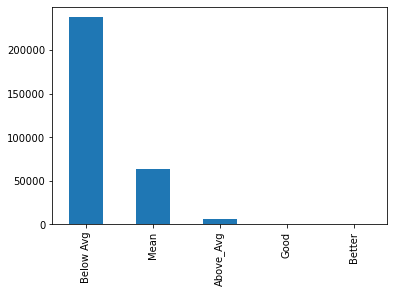

In [39]:
#Binning of numerical variable
pd.cut(inp0['AMT_CREDIT'],bins=5,labels=['Below Avg','Mean','Above_Avg','Good','Better']).value_counts().plot(kind='bar');

Inference: Not many outliers found

### Univariate Analysis

#### Categorical - NAME_CONTRACT_TYPE

In [40]:
inp0["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

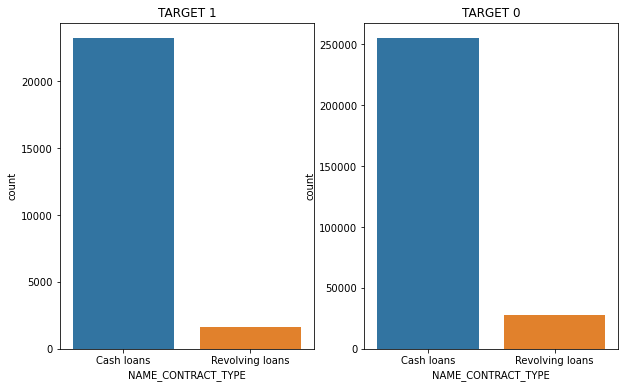

In [41]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_CONTRACT_TYPE", data=df_1)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_CONTRACT_TYPE", data=df_0);

Inference: Cash loan is the preferred mode of loan product among both types of target group

#### Categorical - CODE_GENDER

In [42]:
inp0["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

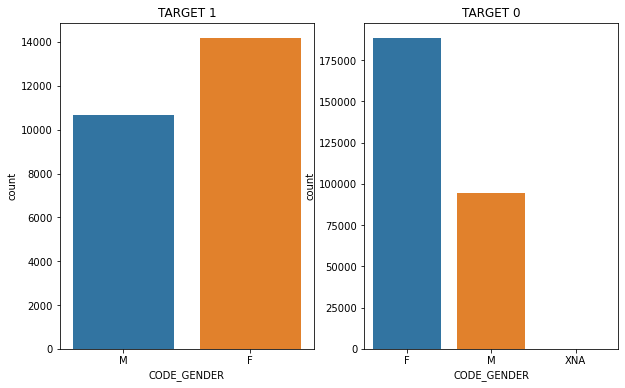

In [43]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="CODE_GENDER", data=df_1)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="CODE_GENDER", data=df_0);

Inference: In both groups, females are more credit hungry than males

#### Categorical - NAME_INCOME_TYPE

In [44]:
inp0["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

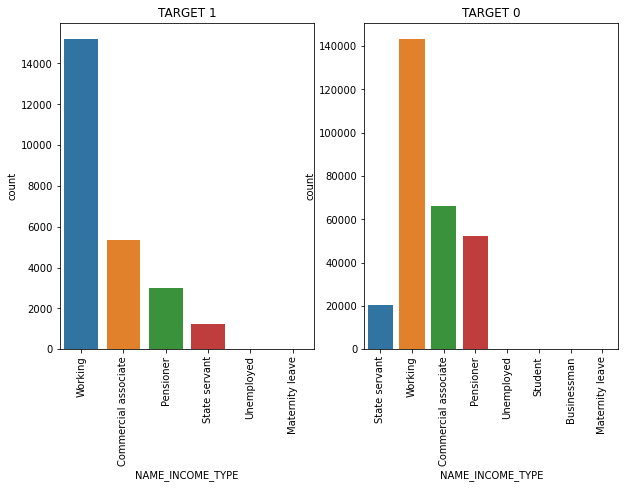

In [45]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_INCOME_TYPE", data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_INCOME_TYPE", data=df_0)
plt.xticks(rotation=90);

Inference: > State servant remain a preferred category with lesser cases of loan default
           > Working class remain a dynamic category, both from credit hunger and default perspective.
           > Among working class, around 10% are more prone to defaults. This %age is lesser for other categories like 
           Commercial associate, state servant and pensioner
            
    

#### Categorical - NAME_EDUCATION_TYPE

In [46]:
inp0["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

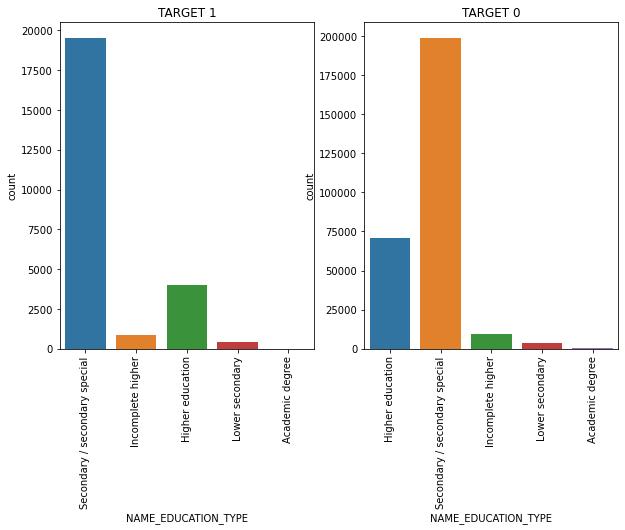

In [47]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_EDUCATION_TYPE", data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_EDUCATION_TYPE", data=df_0)
plt.xticks(rotation=90);

Inference: > Taking a clue from above, within working class, consumers with edification in secondary/seconday special are the
             dynamic category. 
           > Chances of default are lesser with consumers with incomplete higher education and higher education  

#### Categorical -NAME_FAMILY_STATUS

In [48]:
inp0["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

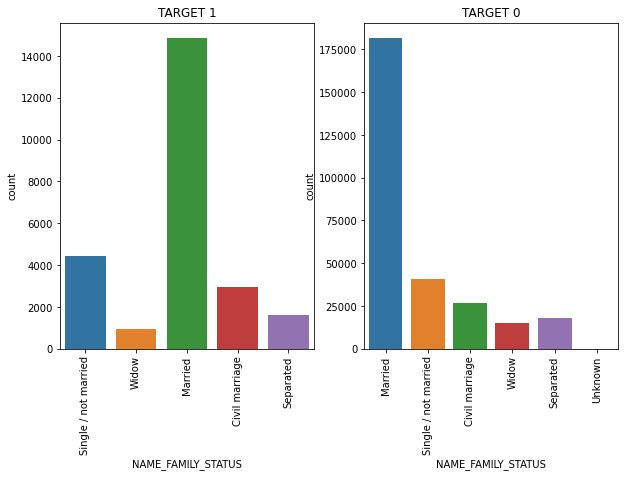

In [49]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_FAMILY_STATUS", data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_FAMILY_STATUS", data=df_0)
plt.xticks(rotation=90);

Inference: > Family status is another variable that has an impact on default and especially married. 
           > Married consumers likely riskier than single/ not married followed by civil marriage

#### Categorical - NAME_HOUSING_TYPE

In [50]:
inp0["NAME_HOUSING_TYPE"].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

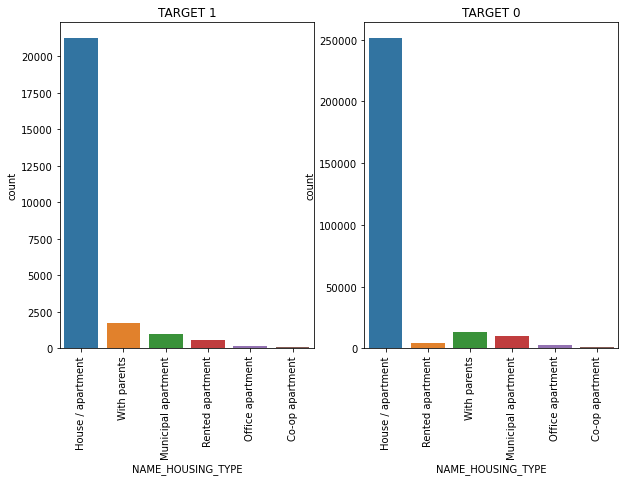

In [51]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_HOUSING_TYPE", data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_HOUSING_TYPE", data=df_0)
plt.xticks(rotation=90);

Inference: There is no significant coorelation with housing type variable

#### Categorical -OCCUPATION_TYPE

In [52]:
inp0["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

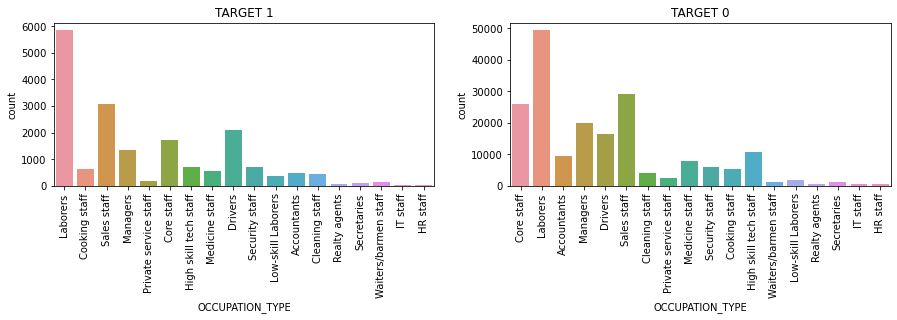

In [53]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="OCCUPATION_TYPE", data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="OCCUPATION_TYPE", data=df_0)
plt.xticks(rotation=90);

Inference: > Among working class, labourers (around 10%) are likely to do more defaults followed by sales staff, drivers and core staff.

#### Continous - AMT_CREDIT

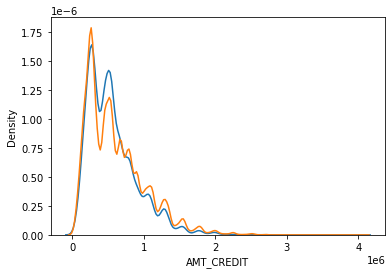

In [54]:
sns.distplot(df_1["AMT_CREDIT"],hist=False,label="Target 1")    #Orange
sns.distplot(df_0["AMT_CREDIT"],hist=False,label="Target 0");   #Blue

Inference: Credit hunger is more or less similar in both types of target groups

#### Continous -AMT_ANNUITY

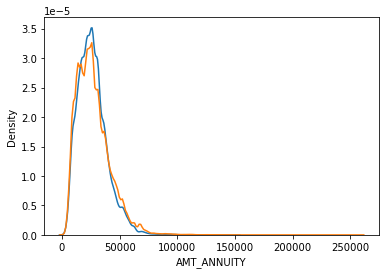

In [55]:
sns.distplot(df_1["AMT_ANNUITY"],hist=False,label="Target 1")   #orange
sns.distplot(df_0["AMT_ANNUITY"],hist=False,label="Target 0");  #Blue

Inference: Higher density in a small band of annuity reveals the both types of target group has a similar credit needs

#### Continous -REGION_RATING_CLIENT

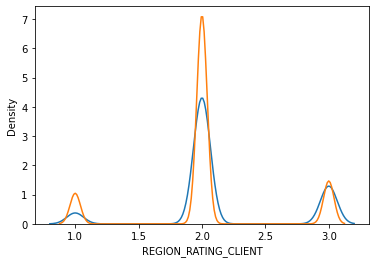

In [56]:
sns.distplot(df_1["REGION_RATING_CLIENT"],hist=False,label="Target 1")    #Orange
sns.distplot(df_0["REGION_RATING_CLIENT"],hist=False,label="Target 0");   #BLue

Inference: There is no significant correlation. Both of target groups follow similar pattern

#### Continous -DAYS_EMPLOYED

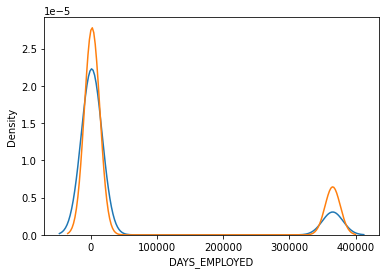

In [57]:
sns.distplot(df_1["DAYS_EMPLOYED"],hist=False,label="Target 1")  #Orange
sns.distplot(df_0["DAYS_EMPLOYED"],hist=False,label="Target 0"); #Blue

Inference: > There is no significant correlation between the two
           > The figure reveals the fresh employees (less than 2 years) are more riskier than employees spend a considerable 
           time-frame 

#### Continous -AMT_REQ_CREDIT_BUREAU_YEAR

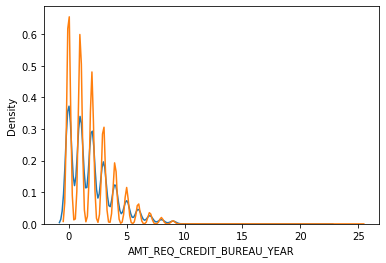

In [58]:
sns.distplot(df_1["AMT_REQ_CREDIT_BUREAU_YEAR"],hist=False,label="Target 1")   #Orange
sns.distplot(df_0["AMT_REQ_CREDIT_BUREAU_YEAR"],hist=False,label="Target 0");  #Blue

Inference: Both target groups follow a similar pattern

#### Continous -AMT_GOODS_PRICE

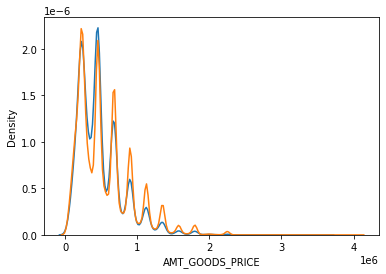

In [59]:
sns.distplot(df_1["AMT_GOODS_PRICE"],hist=False,label="Target 1")   #Orange
sns.distplot(df_0["AMT_GOODS_PRICE"],hist=False,label="Target 0");  #blue

Inference: Both target groups follow a similar pattern. In a very few cases, credit hunger is higher than good price in Target group 1

#### Continous -DAYS_LAST_PHONE_CHANGE

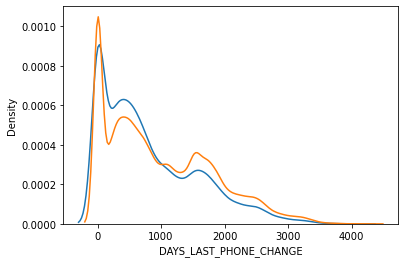

In [60]:
sns.distplot(df_1["DAYS_LAST_PHONE_CHANGE"],hist=False,label="Target 1")   #Orange
sns.distplot(df_0["DAYS_LAST_PHONE_CHANGE"],hist=False,label="Target 0");  #Blue

Inference: Both follow a similar pattern, with few instances where the consumers change their phone numbers in less than 3 years are likely are riskier

#### Continous -OBS_60_CNT_SOCIAL_CIRCLE

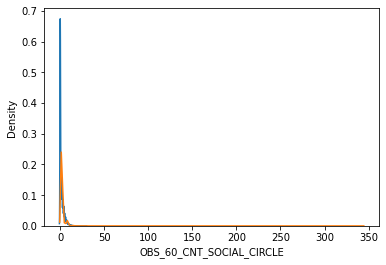

In [61]:
sns.distplot(df_1["OBS_60_CNT_SOCIAL_CIRCLE"],hist=False,label="Target 1")   #Orange
sns.distplot(df_0["OBS_60_CNT_SOCIAL_CIRCLE"],hist=False,label="Target 0");  #Blue

Inference: Social circle has a signicant impact on the riskiness of the consumers.
          > Consumers with a social circle having observable default of 60 days past due (less than 5) are riskier than the
          remaining

#### Continous -DEF_30_CNT_SOCIAL_CIRCLE

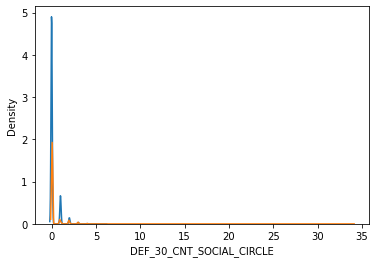

In [62]:
sns.distplot(df_1["DEF_30_CNT_SOCIAL_CIRCLE"],hist=False,label="Target 1")   #Orange
sns.distplot(df_0["DEF_30_CNT_SOCIAL_CIRCLE"],hist=False,label="Target 0");  #blue

Inferences: > Consumers with a social circle with default background (Greater than 1) are riskier than remaining.
            > Chances of default are higher with consumers having social circle with default 30 days past due

### Bivariate Analysis

## Continous Continous

#### AMT_INCOME_TOTAL	V/S  AMT_CREDIT

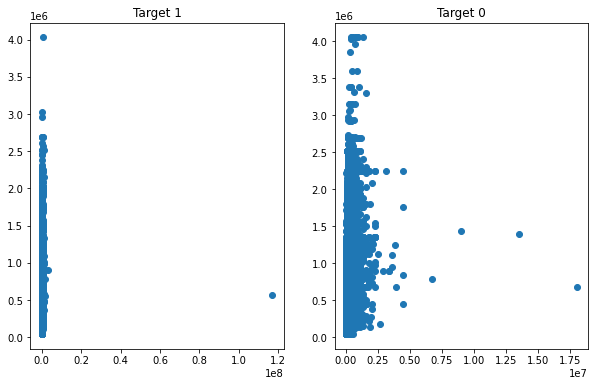

In [63]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
plt.scatter(df_1["AMT_INCOME_TOTAL"], df_1["AMT_CREDIT"]) 
plt.subplot(1,2,2)
plt.title("Target 0")
plt.scatter(df_0["AMT_INCOME_TOTAL"], df_0["AMT_CREDIT"]);

Inference: Target 1 with higher chances of default desires a 2x-2.5x credit of his total income
           > Very few cases go beyond 3x
           > If a consumer is asking loan more than his present earning are likely to default more

#### DAYS_LAST_PHONE_CHANGE V/S  AMT_CREDIT

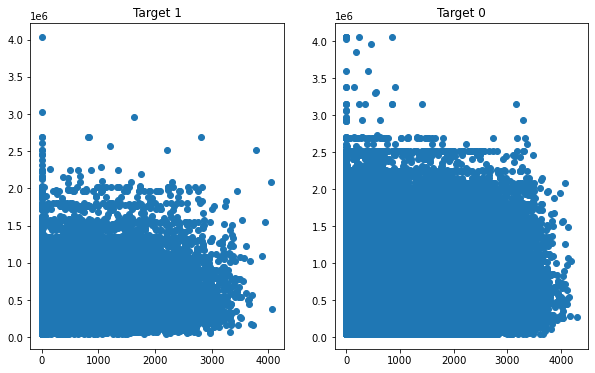

In [64]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
plt.scatter(df_1["DAYS_LAST_PHONE_CHANGE"], df_1["AMT_CREDIT"])
plt.subplot(1,2,2)
plt.title("Target 0")
plt.scatter(df_0["DAYS_LAST_PHONE_CHANGE"], df_0["AMT_CREDIT"]);

Inference: There is no significant coorelation among both the groups.
           > Target 1 likely to retain the phone number for a lesser number of days than Target 0

#### DAYS_LAST_PHONE_CHANGE V/S  AMT_ANNUITY

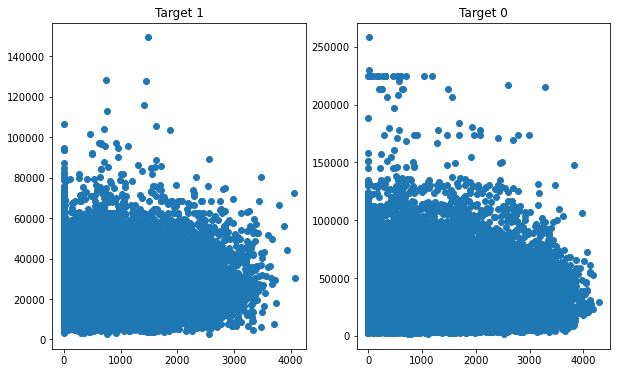

In [65]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
plt.scatter(df_1["DAYS_LAST_PHONE_CHANGE"], df_1["AMT_ANNUITY"])
plt.subplot(1,2,2)
plt.title("Target 0")
plt.scatter(df_0["DAYS_LAST_PHONE_CHANGE"], df_0["AMT_ANNUITY"]);

Inference: There is no significant coorelation among both the groups.
           > Target 1 likely to retain the phone number for a lesser number of days than Target 0

#### CODE_GENDER v/s AMT_CREDIT

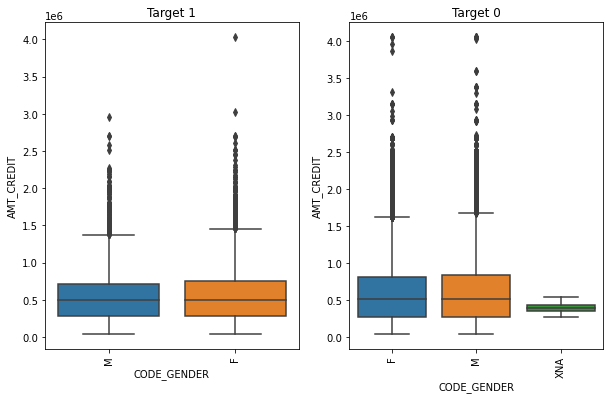

In [66]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
sns.boxplot(x="CODE_GENDER", y="AMT_CREDIT",data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Target 0")
sns.boxplot(x="CODE_GENDER", y="AMT_CREDIT",data=df_0)
plt.xticks(rotation=90);

Inference: There is no significant coorelation between the two except females are more riskier than males. 

#### Bivariate categorical continous

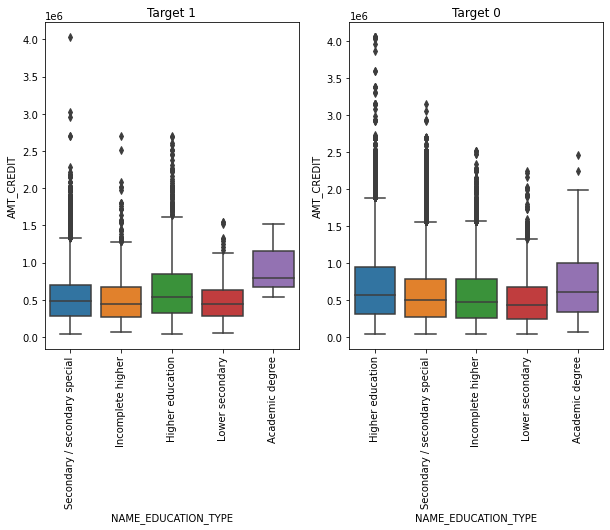

In [67]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
sns.boxplot(x="NAME_EDUCATION_TYPE", y="AMT_CREDIT",data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Target 0")
sns.boxplot(x="NAME_EDUCATION_TYPE", y="AMT_CREDIT",data=df_0)
plt.xticks(rotation=90);

Inference: Higher education remain a preferred category who are less riskier to defaults

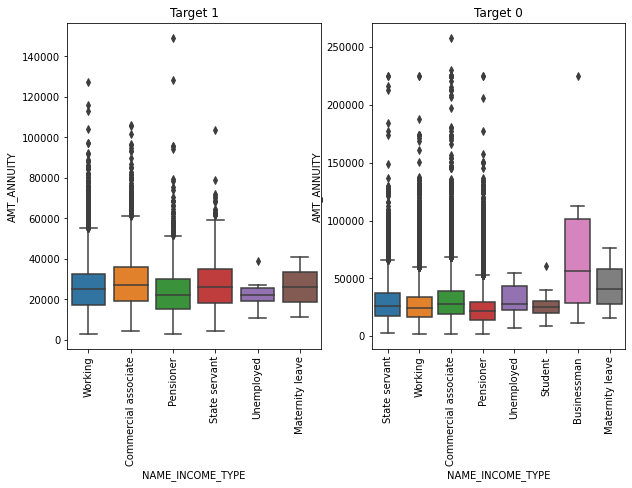

In [68]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_ANNUITY",data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Target 0")
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_ANNUITY",data=df_0)
plt.xticks(rotation=90);

Inference: State servant are less riskier than other categories in terms of loan default

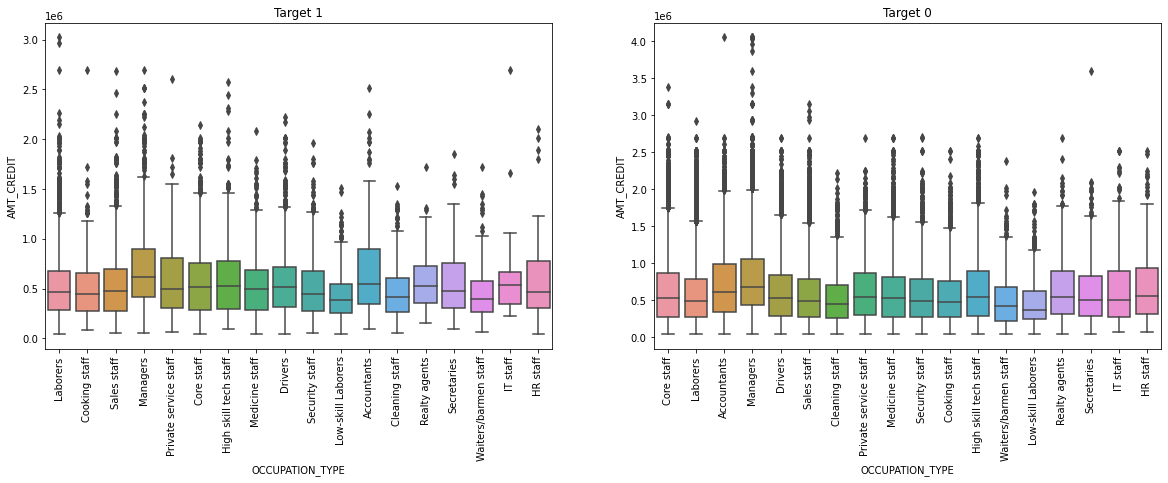

In [69]:
  plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Target 1")
sns.boxplot(x="OCCUPATION_TYPE", y="AMT_CREDIT",data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Target 0")
sns.boxplot(x="OCCUPATION_TYPE", y="AMT_CREDIT",data=df_0)
plt.xticks(rotation=90);

Inference: In both cases, accountants and managers have a higher credit requirements than others.

#### Bivariate Categorical categorical

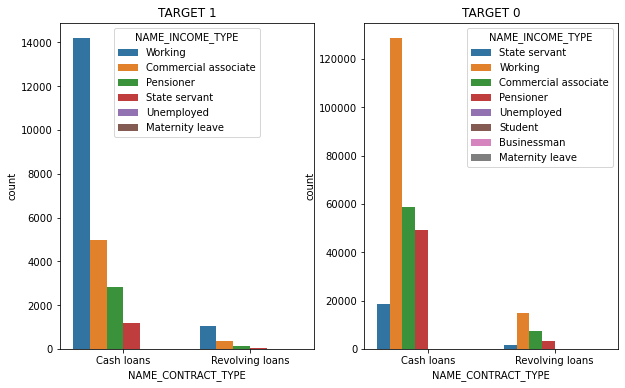

In [70]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_CONTRACT_TYPE", hue="NAME_INCOME_TYPE",data=df_1)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_CONTRACT_TYPE", hue="NAME_INCOME_TYPE",data=df_0);

Inference: State servant are less riskier

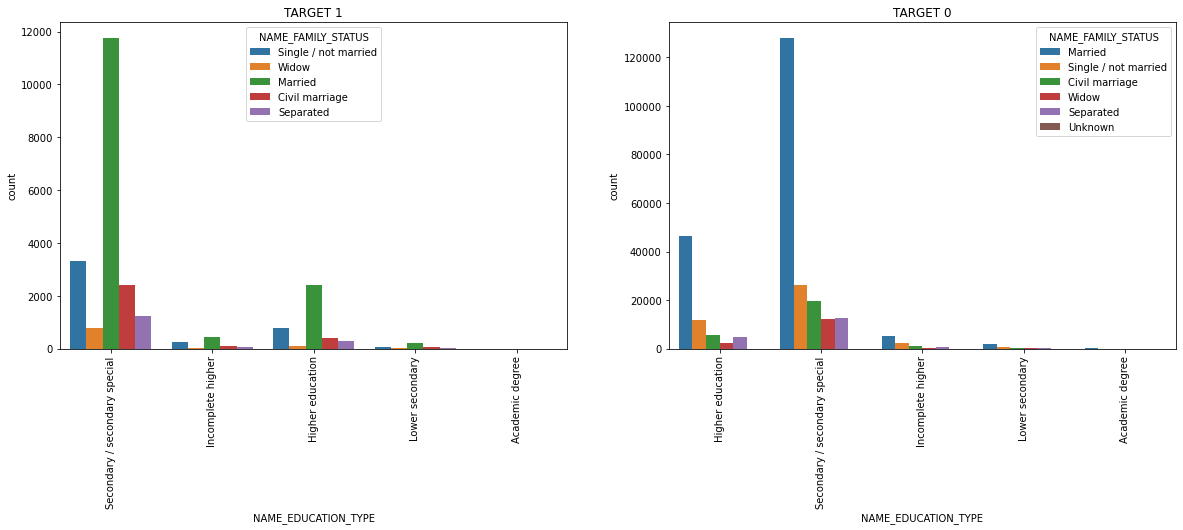

In [71]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_EDUCATION_TYPE", hue="NAME_FAMILY_STATUS",data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_EDUCATION_TYPE", hue="NAME_FAMILY_STATUS",data=df_0)
plt.xticks(rotation=90);

Inference: Consumers with secondary/secondary special edification and are married are most dynamic group. Around 10% of those likely to default on payments

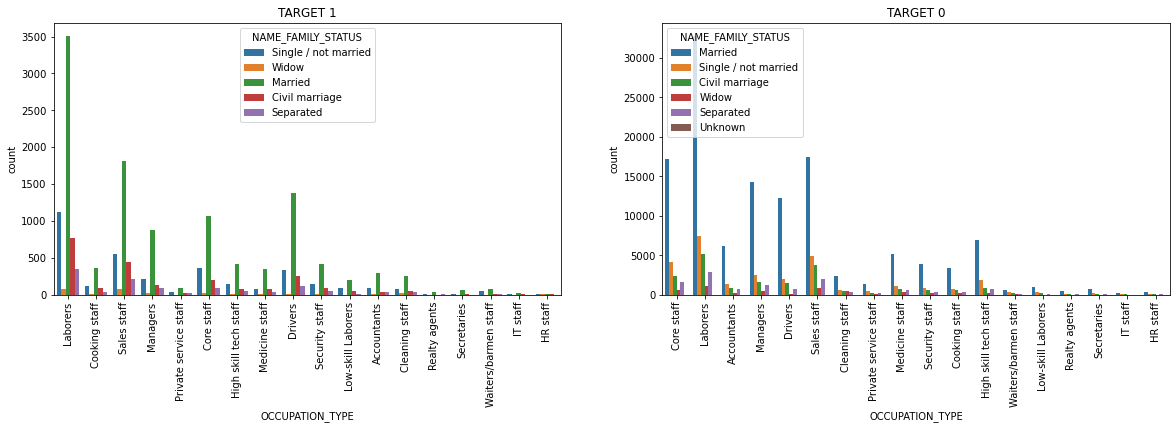

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="OCCUPATION_TYPE", hue="NAME_FAMILY_STATUS",data=df_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="OCCUPATION_TYPE", hue="NAME_FAMILY_STATUS",data=df_0)
plt.xticks(rotation=90);

Inference: Married men in all the occupation type remain a dynamic category. 10% of labourers default the most followed by sales staff, 

## Correlation heat map

In [73]:
#plot the correlation matrix of "AMT_CREDIT","DAYS_EMPLOYED","AMT_GOODS_PRICE"  in inp0 dataframe.
inp0[["AMT_CREDIT","DAYS_EMPLOYED","AMT_GOODS_PRICE"]].corr()

,AMT_CREDIT,DAYS_EMPLOYED,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,-0.064319,0.986734
DAYS_EMPLOYED,-0.064319,1.000000,-0.062190
AMT_GOODS_PRICE,0.986734,-0.062190,1.000000


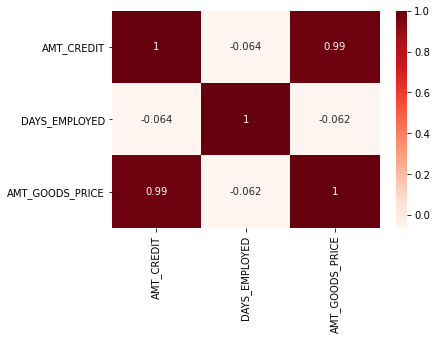

In [74]:
sns.heatmap(inp0[["AMT_CREDIT","DAYS_EMPLOYED","AMT_GOODS_PRICE"]].corr() ,annot=True, cmap="Reds")
plt.show()

Inference: Not a significant corelation

In [75]:
#plot the correlation matrix of "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "REGION_RATING_CLIENT"  in inp0 dataframe.
inp0[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "REGION_RATING_CLIENT"]].corr()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT
OBS_30_CNT_SOCIAL_CIRCLE,1.000000,0.329338,0.034330
DEF_30_CNT_SOCIAL_CIRCLE,0.329338,1.000000,0.015394
REGION_RATING_CLIENT,0.034330,0.015394,1.000000


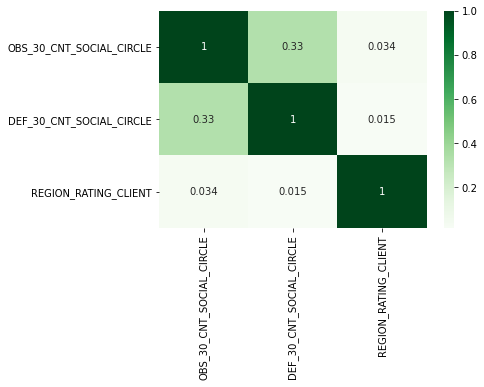

In [76]:
sns.heatmap(inp0[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "REGION_RATING_CLIENT"]].corr() ,annot=True, cmap="Greens")
plt.show()

Inference: Not a significant corelation

In [77]:
#plot the correlation matrix of "AMT_CREDIT", "AMT_REQ_CREDIT_BUREAU_QRT" and "AMT_REQ_CREDIT_BUREAU_YEAR"  in inp0 dataframe.
inp0[["AMT_CREDIT","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].corr()

,AMT_CREDIT,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_CREDIT,1.000000,0.015925,-0.048448
AMT_REQ_CREDIT_BUREAU_QRT,0.015925,1.000000,0.076208
AMT_REQ_CREDIT_BUREAU_YEAR,-0.048448,0.076208,1.000000


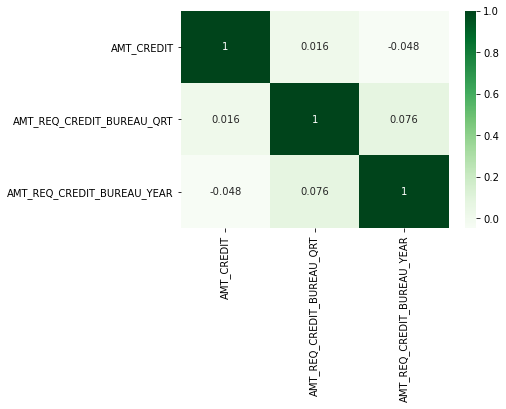

In [78]:
sns.heatmap(inp0[["AMT_CREDIT","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].corr() ,annot=True, cmap="Greens")
plt.show()

Inference: Not a significant corelation

In [79]:
# Now load the previous_application.csv 
inp1= pd.read_csv("previous_application.csv")
inp1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [80]:
# Now merging the Previous application data with the above application data.
inp2=pd.merge(inp0, inp1, on = "SK_ID_CURR", how = "inner") 
inp2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,16856.0,1262.0,5128.0,410.0,Laborers,1,1,0.0,0.0,0.0,0.0,787.0,0.0,1.0,2073384,Cash loans,16

In [81]:
inp2.shape

(1413701, 62)

In [82]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 62 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   AMT_INCOME_TOTAL             1413701 non-null  float64
 5   AMT_CREDIT_x                 1413701 non-null  float64
 6   AMT_ANNUITY_x                1413701 non-null  float64
 7   AMT_GOODS_PRICE_x            1413701 non-null  float64
 8   NAME_INCOME_TYPE             1413701 non-null  object 
 9   NAME_EDUCATION_TYPE          1413701 non-null  object 
 10  NAME_FAMILY_STATUS           1413701 non-null  object 
 11  NAME_HOUSING_TYPE            1413701 non-null  object 
 12  DAYS_BIRTH                   1413701 non-n

In [83]:
#Checking the null values percentage.
inp2.isnull().sum() * 100 / len(inp2)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_x            0.000000
CODE_GENDER                     0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_x                    0.000000
AMT_ANNUITY_x                   0.000000
AMT_GOODS_PRICE_x               0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                32.367523
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.222536
DEF_30_CNT_SOCIAL_CIRCLE        0.222536
OBS_60_CNT_SOCIAL_CIRCLE        0.222536
DEF_60_CNT_SOCIAL_CIRCLE        0.222536
DAYS_LAST_PHONE_CHANGE          0.000000
AMT_REQ_CREDIT_B

In [84]:
# Dropping the columns with missing values more than 50%.
inp2.drop(["AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED"] , axis=1, inplace=True)
inp2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,16856.0,1262.0,5128.0,410.0,Laborers,1,1,0.0,0.0,0.0,0.0,787.0,0.0,1.0,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,THURSDAY,12,Y,1,XNA,Approved,-648,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,7

In [85]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 58 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   AMT_INCOME_TOTAL             1413701 non-null  float64
 5   AMT_CREDIT_x                 1413701 non-null  float64
 6   AMT_ANNUITY_x                1413701 non-null  float64
 7   AMT_GOODS_PRICE_x            1413701 non-null  float64
 8   NAME_INCOME_TYPE             1413701 non-null  object 
 9   NAME_EDUCATION_TYPE          1413701 non-null  object 
 10  NAME_FAMILY_STATUS           1413701 non-null  object 
 11  NAME_HOUSING_TYPE            1413701 non-null  object 
 12  DAYS_BIRTH                   1413701 non-n

In [86]:
#dropping the columns which would not come much in use for analysis.
inp2.drop(inp2.iloc[:,32:37], axis=1,inplace=True)
inp2.drop(inp2.iloc[:,38:39], axis=1,inplace=True)
inp2.drop(inp2.iloc[:,39:40], axis=1,inplace=True)
inp2.drop(inp2.iloc[:,40:41], axis=1,inplace=True)
inp2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,-606,XNA,XAP,NaN,New,POS,Stone,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,-746,XNA,XAP,Unaccompanied,Repeater,Cash,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,-828,Cash through the bank,XAP,Family,Refreshed,POS,Stone,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,POS,Country-wide,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,POS,Regional / Local,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,16856.0,1262.0,5128.0,410.0,Laborers,1,1,0.0,0.0,0.0,0.0,787.0,0.0,1.0,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,Approved,-648,Cash through the bank,XAP,NaN,Repeater,Cash,Credit and cash offices,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,16856.0,1262.0,5128.0,410.0,Laborers,1,1,0.0,0.0,0.0,0.0,787.0,0.0,1.0,1708056,Revolving loans,2250.000,45000.0,45000.0,45000.0,Refused,-456,XNA,HC,Unaccompanied,Repeater,Cards,Country-wide,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,157

In [87]:
# Making the columns with negative values as positive values by using abs().
inp2["DAYS_DECISION"]=abs(inp2["DAYS_DECISION"])
inp2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,606,XNA,XAP,NaN,New,POS,Stone,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,746,XNA,XAP,Unaccompanied,Repeater,Cash,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,828,Cash through the bank,XAP,Family,Refreshed,POS,Stone,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,2341,Cash through the bank,XAP,Family,Refreshed,POS,Country-wide,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Approved,815,Cash through the bank,XAP,Unaccompanied,New,POS,Regional / Local,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,16856.0,1262.0,5128.0,410.0,Laborers,1,1,0.0,0.0,0.0,0.0,787.0,0.0,1.0,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,Approved,648,Cash through the bank,XAP,NaN,Repeater,Cash,Credit and cash offices,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,16856.0,1262.0,5128.0,410.0,Laborers,1,1,0.0,0.0,0.0,0.0,787.0,0.0,1.0,1708056,Revolving loans,2250.000,45000.0,45000.0,45000.0,Refused,456,XNA,HC,Unaccompanied,Repeater,Cards,Country-wide,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,157500.0,6

In [88]:
inp2.iloc[:,-5:-1]=abs(inp2.iloc[:,-5:-1])
inp2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,606,XNA,XAP,NaN,New,POS,Stone,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,746,XNA,XAP,Unaccompanied,Repeater,Cash,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,828,Cash through the bank,XAP,Family,Refreshed,POS,Stone,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,2341,Cash through the bank,XAP,Family,Refreshed,POS,Country-wide,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Approved,815,Cash through the bank,XAP,Unaccompanied,New,POS,Regional / Local,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,16856.0,1262.0,5128.0,410.0,Laborers,1,1,0.0,0.0,0.0,0.0,787.0,0.0,1.0,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,Approved,648,Cash through the bank,XAP,NaN,Repeater,Cash,Credit and cash offices,XNA,24.0,middle,Cash X-Sell: middle,365243.0,618.0,72.0,558.0,528.0,1.0
1413697,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,16856.0,1262.0,5128.0,410.0,Laborers,1,1,0.0,0.0,0.0,0.0,787.0,0.0,1.0,1708056,Revolving loans,2250.000,45000.0,45000.0,45000.0,Refused,456,XNA,HC,Unaccompanied,Repeater,Cards,Country-wide,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,157500.0,675000.0,49117.5,675000

### Checking the imbalance percentage using Target field.

In [89]:
inp2["TARGET"].value_counts()

0    1291341
1     122360
Name: TARGET, dtype: int64

In [90]:
inp2["TARGET"].value_counts(normalize=True)*100

0    91.344704
1     8.655296
Name: TARGET, dtype: float64

In [91]:
#Partitioning
df_p1=inp2[inp2["TARGET"]==1]
df_p0=inp2[inp2["TARGET"]==0]

In [92]:
df_p1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461.0,637.0,3648.0,2120.0,Laborers,2,2,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,606,XNA,XAP,NaN,New,POS,Stone,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
161,100047,1,Cash loans,M,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,17482.0,1262.0,1182.0,1029.0,Laborers,2,2,0.0,0.0,0.0,0.0,1075.0,0.0,4.0,1472630,Revolving loans,22500.000,0.0,450000.0,NaN,Approved,1172,XNA,XAP,NaN,Repeater,Cards,Credit and cash offices,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
162,100047,1,Cash loans,M,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,17482.0,1262.0,1182.0,1029.0,Laborers,2,2,0.0,0.0,0.0,0.0,1075.0,0.0,4.0,2426800,Cash loans,11117.700,157500.0,157500.0,157500.0,Approved,1467,Cash through the bank,XAP,Family,Refreshed,Cash,Credit and cash offices,XNA,24.0,high,Cash X-Sell: high,365243.0,1437.0,747.0,1167.0,1163.0,1.0
163,100047,1,Cash loans,M,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,17482.0,1262.0,1182.0,1029.0,Laborers,2,2,0.0,0.0,0.0,0.0,1075.0,0.0,4.0,1021215,Cash loans,31674.870,675000.0,744498.0,675000.0,Refused,1075,Cash through the bank,LIMIT,Family,Repeater,Cash,Credit and cash offices,XNA,36.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
164,100047,1,Cash loans,M,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,17482.0,1262.0,1182.0,1029.0,Laborers,2,2,0.0,0.0,0.0,0.0,1075.0,0.0,4.0,1035321,Consumer loans,4586.895,38205.0,34384.5,38205.0,Approved,2634,Cash through the bank,XAP,"Spouse, partner",New,POS,Country-wide,Connectivity,10.0,low_normal,POS mobile with interest,365243.0,2601.0,2331.0,2331.0,2326.0,0.0


In [93]:
df_p0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,746,XNA,XAP,Unaccompanied,Repeater,Cash,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,828,Cash through the bank,XAP,Family,Refreshed,POS,Stone,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,16765.0,1188.0,1186.0,291.0,Core staff,1,1,1.0,0.0,1.0,0.0,828.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,2341,Cash through the bank,XAP,Family,Refreshed,POS,Country-wide,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,19046.0,225.0,4260.0,2531.0,Laborers,2,2,0.0,0.0,0.0,0.0,815.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Approved,815,Cash through the bank,XAP,Unaccompanied,New,POS,Regional / Local,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0
5,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,19005.0,3039.0,9833.0,2437.0,Laborers,2,2,2.0,0.0,2.0,0.0,617.0,NaN,NaN,2078043,Cash loans,24246.000,675000.0,675000.0,675000.0,Approved,181,Cash through the bank,XAP,Unaccompanied,Repeater,Cash,Credit and cash offices,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,151.0,1259.0,151.0,143.0,0.0


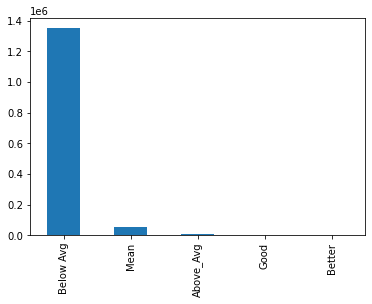

In [136]:
#Binning of numerical variable
pd.cut(inp2['AMT_CREDIT_y'],bins=5,labels=['Below Avg','Mean','Above_Avg','Good','Better']).value_counts().plot(kind='bar');

Inference: Not many outliers

### Univariate Analysis

#### Categorical - NAME_CONTRACT_TYPE

In [94]:
inp2["NAME_CONTRACT_TYPE_x"].value_counts()

Cash loans         1307115
Revolving loans     106586
Name: NAME_CONTRACT_TYPE_x, dtype: int64

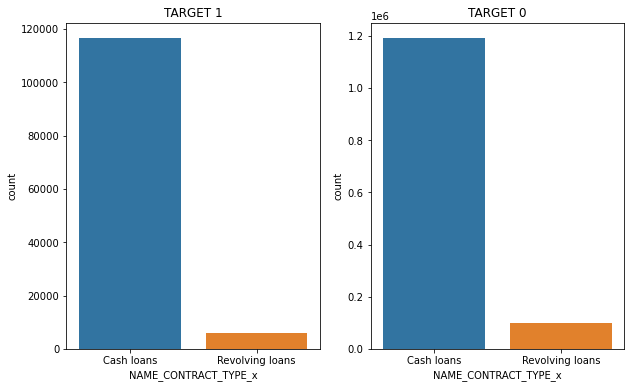

In [95]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_CONTRACT_TYPE_x", data=df_p1)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_CONTRACT_TYPE_x", data=df_p0);

#### Inferences
- TARGET 1 clients as well as TARGET 0 clients have high cash loans than revolving loans

#### Categorical - CODE_GENDER

In [96]:
inp2["CODE_GENDER"].value_counts()

F      955139
M      458507
XNA        55
Name: CODE_GENDER, dtype: int64

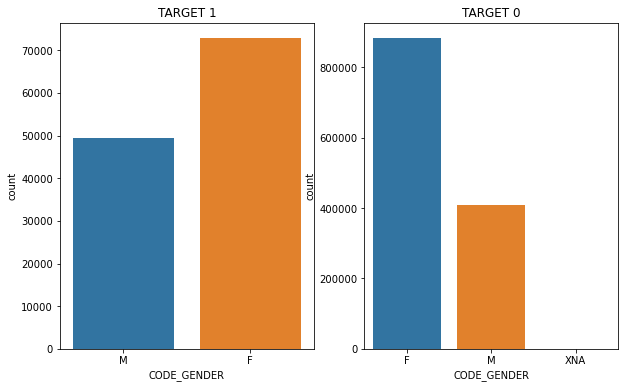

In [97]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="CODE_GENDER", data=df_p1)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="CODE_GENDER", data=df_p0);

#### Inferences
- Female clients of TARGET 1 as well as TARGET 0 are more likely to face difficulties in repaying the loan in few of the first installments as well as repaying it respectively.

#### Categorical - NAME_INCOME_TYPE

In [98]:
inp2["NAME_INCOME_TYPE"].value_counts()

Working                 724089
Commercial associate    321481
Pensioner               273544
State servant            94424
Unemployed                 123
Student                     24
Maternity leave             16
Name: NAME_INCOME_TYPE, dtype: int64

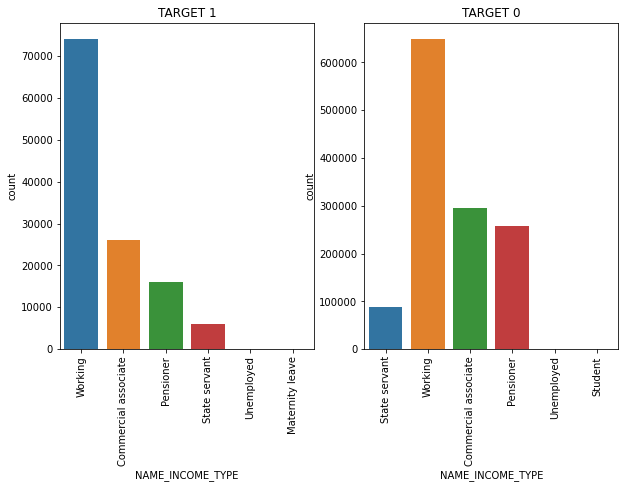

In [99]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_INCOME_TYPE", data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_INCOME_TYPE", data=df_p0)
plt.xticks(rotation=90);

#### Inferences
- Clients who are working can be approved for the loan as they can repay it.
- Clients who are commercial associate have higher chances of repaying the loan in comparison to Pensioner.

#### Categorical - NAME_EDUCATION_TYPE

In [100]:
inp2["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    1037902
Higher education                  312845
Incomplete higher                  45211
Lower secondary                    17164
Academic degree                      579
Name: NAME_EDUCATION_TYPE, dtype: int64

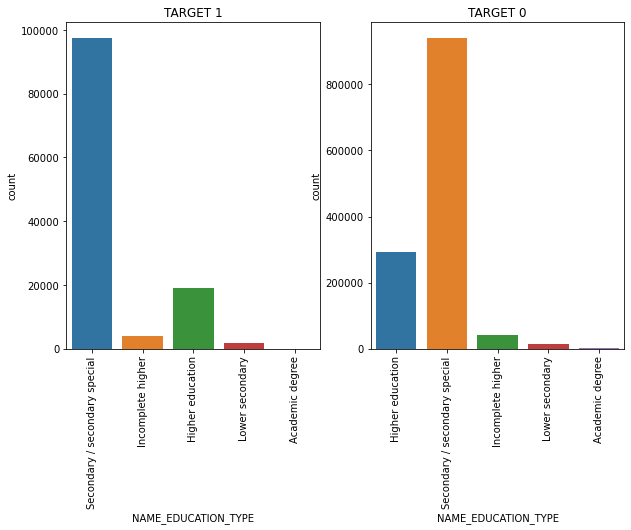

In [101]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_EDUCATION_TYPE", data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_EDUCATION_TYPE", data=df_p0)
plt.xticks(rotation=90);

#### Inferences
- People with secondary education are more likely to get approval for loan and would be an interest profit to industry.
- People with academic degree are more likely to be the defaulter and would be a loss to the industry.
- People with higher education would be at a higher interest profit in comparison to the people with lower secondary education for the industry.

#### Categorical - NAME_HOUSING_TYPE

In [102]:
inp2["NAME_HOUSING_TYPE"].value_counts()

House / apartment      1264952
With parents             61614
Municipal apartment      51533
Rented apartment         19785
Office apartment         11428
Co-op apartment           4389
Name: NAME_HOUSING_TYPE, dtype: int64

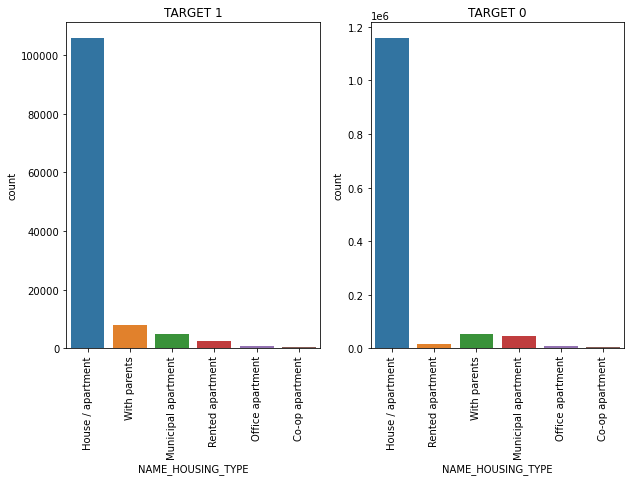

In [103]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_HOUSING_TYPE", data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_HOUSING_TYPE", data=df_p0)
plt.xticks(rotation=90);

#### Inferences
- Majority of consumers who own a House/Apartment can easily repay the loan in comparison to the people who live in a rented apartment or office apartment.

#### Categorical -OCCUPATION_TYPE

In [104]:
inp2["OCCUPATION_TYPE"].value_counts()

Laborers                 251299
Sales staff              151358
Core staff               118272
Managers                  94941
Drivers                   84067
High skill tech staff     48483
Accountants               41958
Medicine staff            39999
Security staff            31702
Cooking staff             28726
Cleaning staff            24328
Private service staff     12238
Low-skill Laborers         9320
Waiters/barmen staff       6132
Secretaries                5738
Realty agents              3544
HR staff                   2313
IT staff                   1703
Name: OCCUPATION_TYPE, dtype: int64

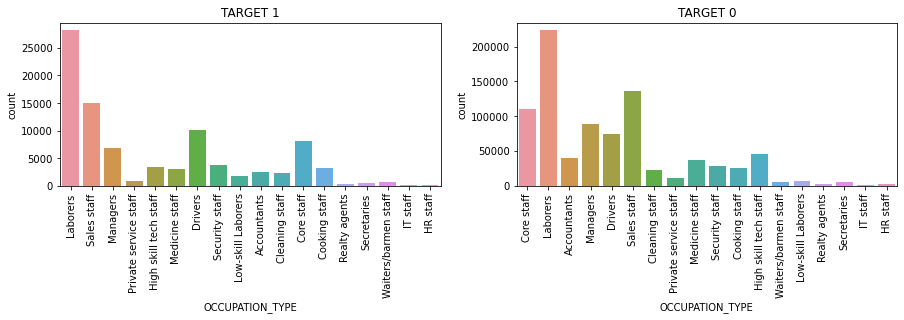

In [105]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="OCCUPATION_TYPE", data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="OCCUPATION_TYPE", data=df_p0)
plt.xticks(rotation=90);

#### Inferences
- Clients who are Laborers are higher in Target1 as well as target 0

#### Categorical -NAME_YIELD_GROUP

In [106]:
inp2["NAME_YIELD_GROUP"].value_counts()

XNA           429198
middle        324971
high          306061
low_normal    274884
low_action     78587
Name: NAME_YIELD_GROUP, dtype: int64

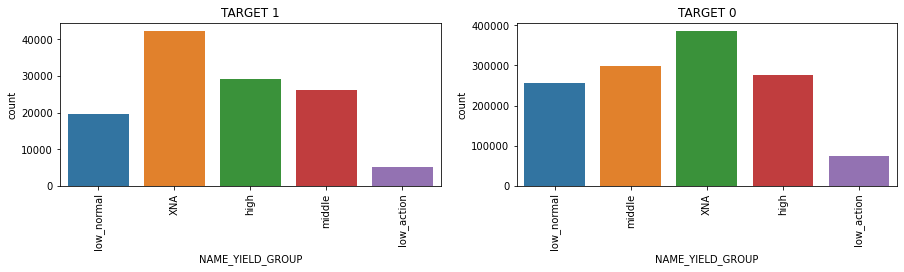

In [107]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_YIELD_GROUP", data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_YIELD_GROUP", data=df_p0)
plt.xticks(rotation=90);

Inference: There is no significant coorelation

#### Continous -CNT_PAYMENT

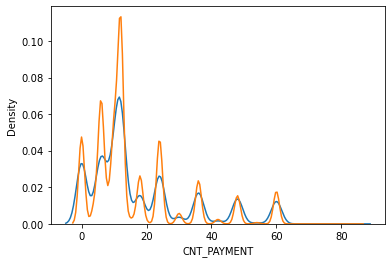

In [108]:
sns.distplot(df_p1["CNT_PAYMENT"],hist=False,label="Target 1")
sns.distplot(df_p0["CNT_PAYMENT"],hist=False,label="Target 0");

Inference: Not a significant corelation

#### Continous - AMT_CREDIT_y

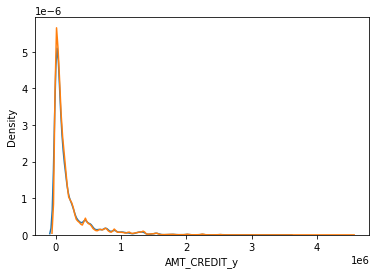

In [109]:
sns.distplot(df_p1["AMT_CREDIT_y"],hist=False,label="Target 1")
sns.distplot(df_p0["AMT_CREDIT_y"],hist=False,label="Target 0");

Inference: Not a significant corelation

#### Continous -DAYS_EMPLOYED

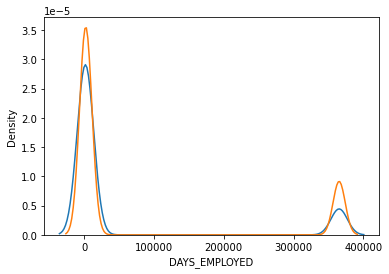

In [110]:
sns.distplot(df_p1["DAYS_EMPLOYED"],hist=False,label="Target 1")
sns.distplot(df_p0["DAYS_EMPLOYED"],hist=False,label="Target 0");

Inference: Fresh employees likely to default more than older employees

#### Continous -AMT_GOODS_PRICE

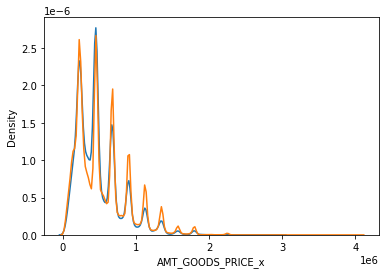

In [111]:
sns.distplot(df_p1["AMT_GOODS_PRICE_x"],hist=False,label="Target 1")
sns.distplot(df_p0["AMT_GOODS_PRICE_x"],hist=False,label="Target 0");

Inference: Not a significant corelation

#### Continous -DAYS_LAST_DUE

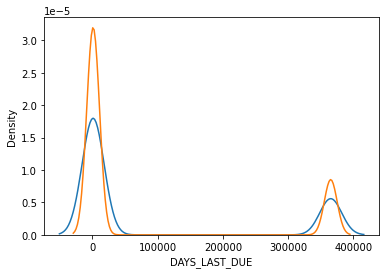

In [112]:
sns.distplot(df_p1["DAYS_LAST_DUE"],hist=False,label="Target 1")
sns.distplot(df_p0["DAYS_LAST_DUE"],hist=False,label="Target 0");

Inference: Not a significant corelation

#### Continous -DAYS_TERMINATION

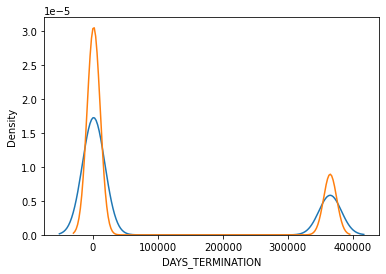

In [113]:
sns.distplot(df_p1["DAYS_TERMINATION"],hist=False,label="Target 1")
sns.distplot(df_p0["DAYS_TERMINATION"],hist=False,label="Target 0");

Inference: Not a significant corelation

#### Continous -NFLAG_INSURED_ON_APPROVAL

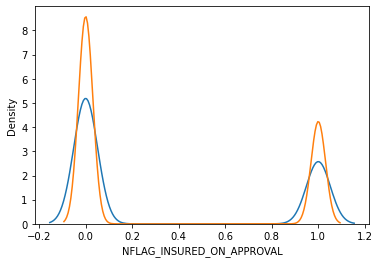

In [114]:
sns.distplot(df_p1["NFLAG_INSURED_ON_APPROVAL"],hist=False,label="Target 1")
sns.distplot(df_p0["NFLAG_INSURED_ON_APPROVAL"],hist=False,label="Target 0");

Inference: Not a significant corelation

### Bivariate Analysis

## Continous Continous

#### AMT_INCOME_TOTAL	V/S  AMT_CREDIT_y

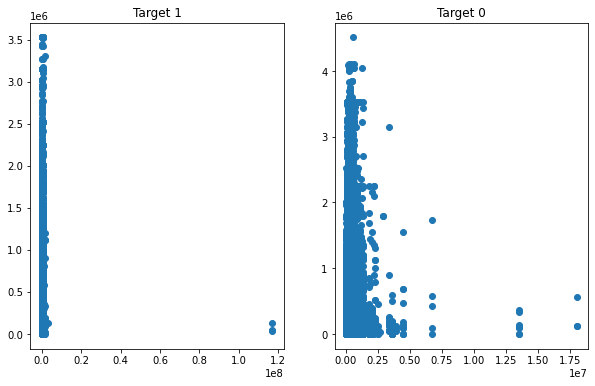

In [115]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
plt.scatter(df_p1["AMT_INCOME_TOTAL"], df_p1["AMT_CREDIT_y"])
plt.subplot(1,2,2)
plt.title("Target 0")
plt.scatter(df_p0["AMT_INCOME_TOTAL"], df_p0["AMT_CREDIT_y"]);

#### Inferences
- There are many outliers for the Target 0 category 

#### AMT_CREDIT_y V/S  CNT_PAYMENT

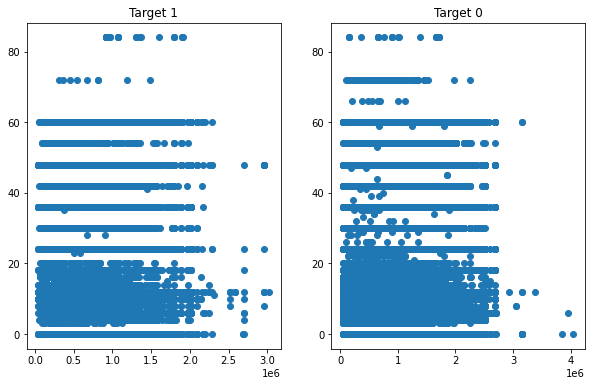

In [116]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
plt.scatter(df_p1["AMT_CREDIT_x"], df_p1["CNT_PAYMENT"])
plt.subplot(1,2,2)
plt.title("Target 0")
plt.scatter(df_p0["AMT_CREDIT_x"], df_p0["CNT_PAYMENT"]);

Inference: Not a significant corelation

#### DAYS_LAST_PHONE_CHANGE V/S  AMT_CREDIT_y

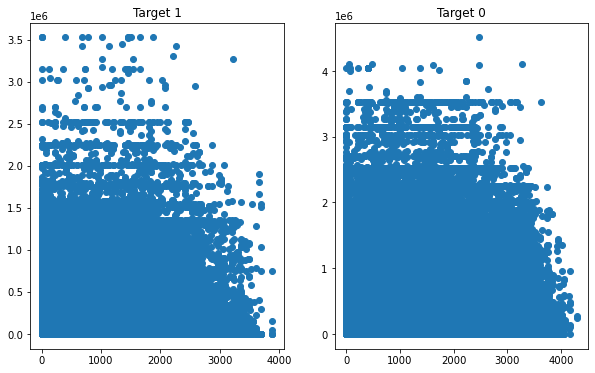

In [117]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
plt.scatter(df_p1["DAYS_LAST_PHONE_CHANGE"], df_p1["AMT_CREDIT_y"])
plt.subplot(1,2,2)
plt.title("Target 0")
plt.scatter(df_p0["DAYS_LAST_PHONE_CHANGE"], df_p0["AMT_CREDIT_y"]);

Inference: Not a significant corelation except already above

#### CNT_PAYMENT  V/S  DAYS_EMPLOYED

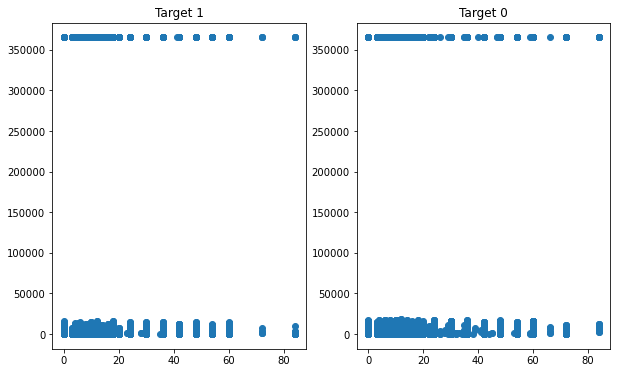

In [118]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
plt.scatter(df_p1["CNT_PAYMENT"], df_p1["DAYS_EMPLOYED"])
plt.subplot(1,2,2)
plt.title("Target 0")
plt.scatter(df_p0["CNT_PAYMENT"], df_p0["DAYS_EMPLOYED"]);

Inference: Not a significant corelation

#### Bivariate categorical continous

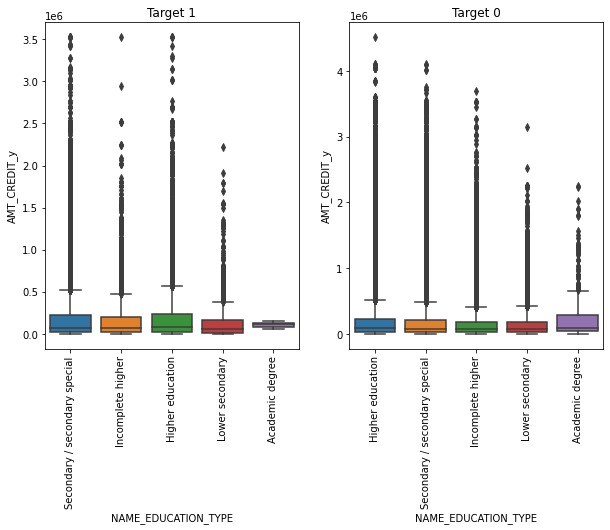

In [119]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
sns.boxplot(x="NAME_EDUCATION_TYPE", y="AMT_CREDIT_y",data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Target 0")
sns.boxplot(x="NAME_EDUCATION_TYPE", y="AMT_CREDIT_y",data=df_p0)
plt.xticks(rotation=90);

Inference: Not a significant corelation except already above

#### NAME_INCOME_TYPE v/s AMT_ANNUITY_y

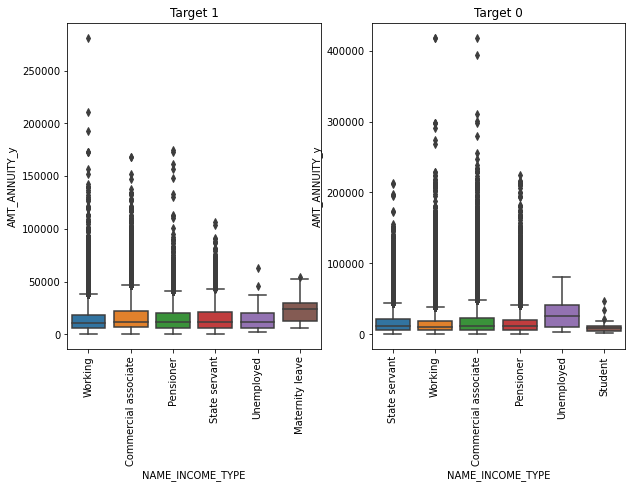

In [120]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_ANNUITY_y",data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Target 0")
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_ANNUITY_y",data=df_p0)
plt.xticks(rotation=90);

Inference: Not a significant corelation except already above

#### NAME_HOUSING_TYPE v/s AMT_CREDIT_y

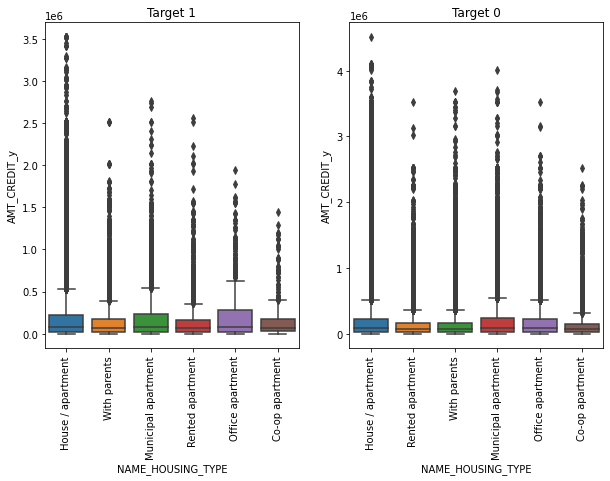

In [121]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Target 1")
sns.boxplot(x="NAME_HOUSING_TYPE", y="AMT_CREDIT_y",data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Target 0")
sns.boxplot(x="NAME_HOUSING_TYPE", y="AMT_CREDIT_y",data=df_p0)
plt.xticks(rotation=90);

Inference: Not a significant corelation except already covered above

#### OCCUPATION_TYPE v/s AMT_CREDIT_y

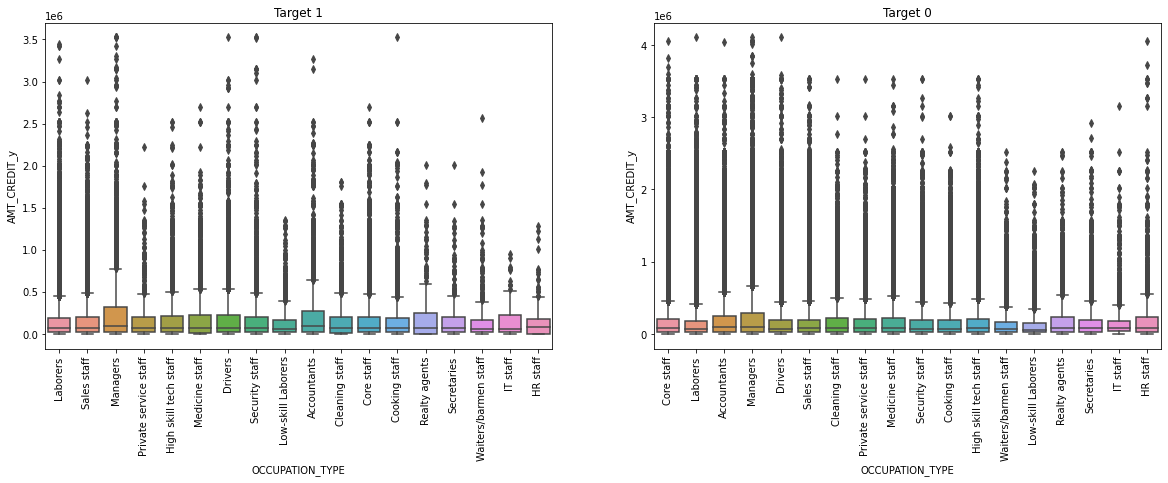

In [122]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Target 1")
sns.boxplot(x="OCCUPATION_TYPE", y="AMT_CREDIT_y",data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("Target 0")
sns.boxplot(x="OCCUPATION_TYPE", y="AMT_CREDIT_y",data=df_p0)
plt.xticks(rotation=90);

Inference: Not a significant corelation except already above

#### Bivariate Categorical categorical

#### NAME_CONTRACT_STATUS v/s NAME_INCOME_TYPE

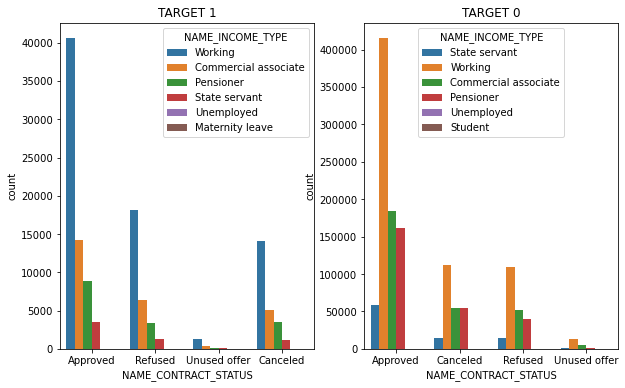

In [123]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_CONTRACT_STATUS", hue="NAME_INCOME_TYPE",data=df_p1)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_CONTRACT_STATUS", hue="NAME_INCOME_TYPE",data=df_p0);

Inference: Not a significant corelation except already above

#### NAME_EDUCATION_TYPE v/s NAME_FAMILY_STATUS

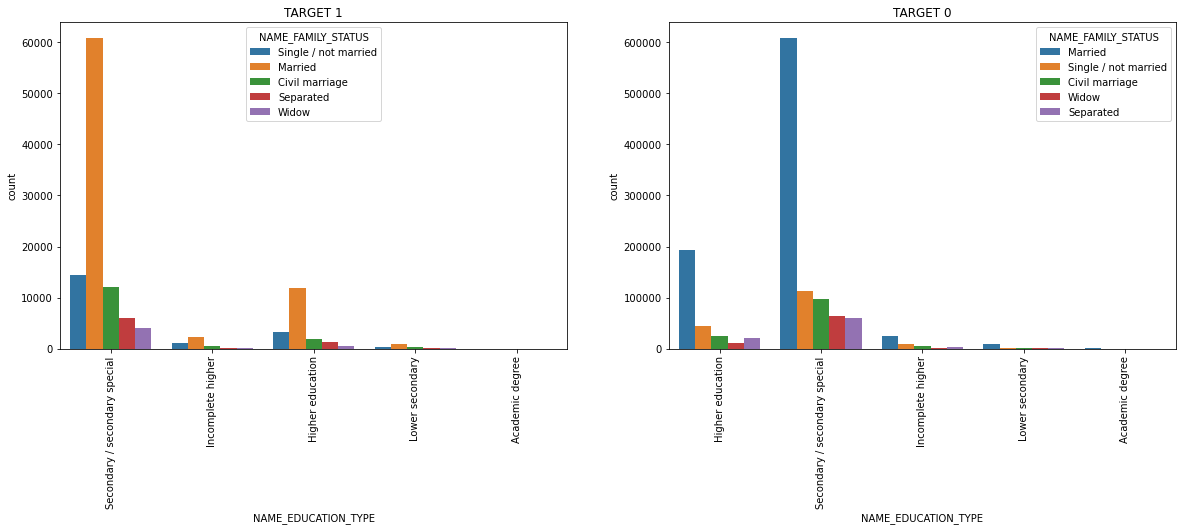

In [124]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_EDUCATION_TYPE", hue="NAME_FAMILY_STATUS",data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_EDUCATION_TYPE", hue="NAME_FAMILY_STATUS",data=df_p0)
plt.xticks(rotation=90);

Inference: Not a significant corelation except already above

#### OCCUPATION_TYPE V/S NAME_FAMILY_STATUS

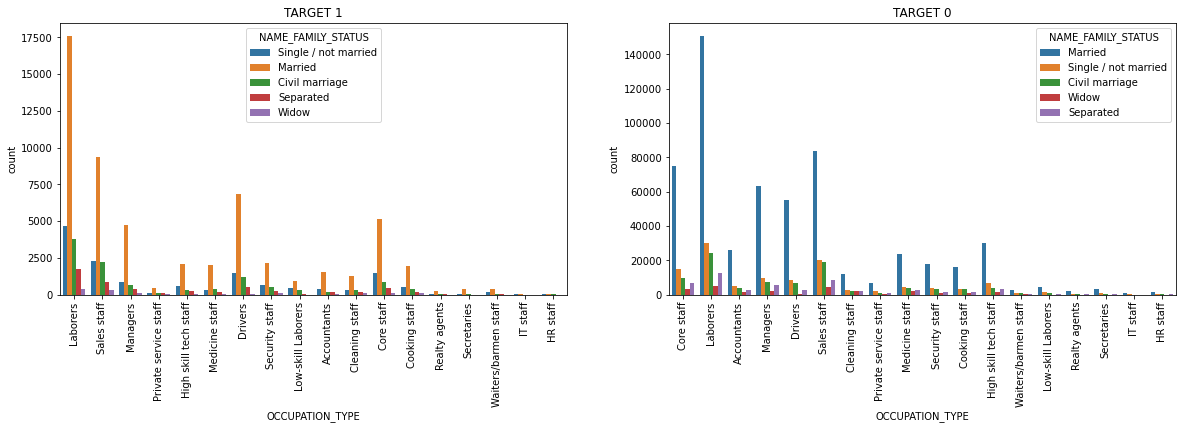

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="OCCUPATION_TYPE", hue="NAME_FAMILY_STATUS",data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="OCCUPATION_TYPE", hue="NAME_FAMILY_STATUS",data=df_p0)
plt.xticks(rotation=90);

Inference: Not a significant corelation except already above

#### NAME_YIELD_GROUP V/S CODE_GENDER

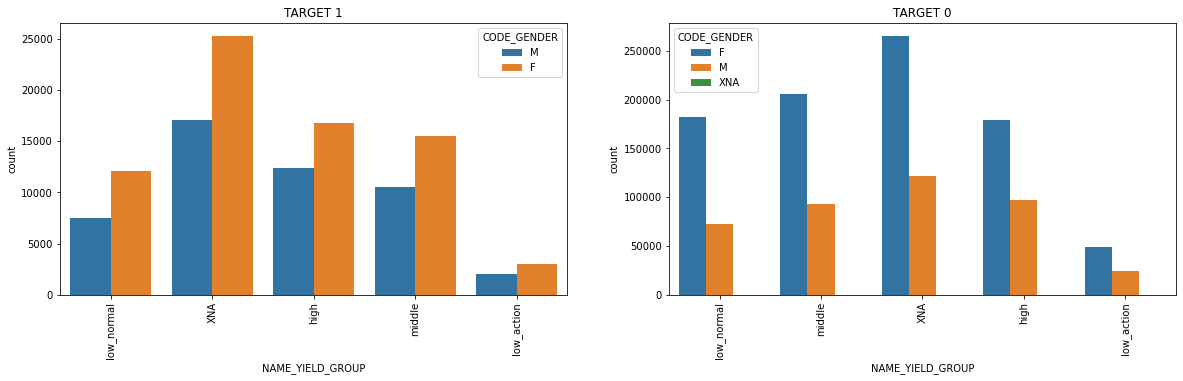

In [126]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("TARGET 1")
sns.countplot(x="NAME_YIELD_GROUP", hue="CODE_GENDER",data=df_p1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title("TARGET 0")
sns.countplot(x="NAME_YIELD_GROUP", hue="CODE_GENDER",data=df_p0)
plt.xticks(rotation=90);

Inference: Not a significant corelation except already above

## Correlation heat map

##### Plot the correlation matrix of "CNT_PAYMENT","AMT_CREDIT_y", "DAYS_EMPLOYED" in inp0 dataframe.

In [127]:
inp2[["CNT_PAYMENT","AMT_CREDIT_y", "DAYS_EMPLOYED"]].corr()

,CNT_PAYMENT,AMT_CREDIT_y,DAYS_EMPLOYED
CNT_PAYMENT,1.000000,0.675539,0.074051
AMT_CREDIT_y,0.675539,1.000000,0.005046
DAYS_EMPLOYED,0.074051,0.005046,1.000000


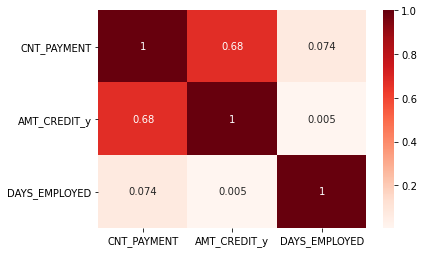

In [128]:
sns.heatmap(inp2[["CNT_PAYMENT","AMT_CREDIT_y", "DAYS_EMPLOYED"]].corr() ,annot=True, cmap="Reds")
plt.show()

Inference: Not a significant corelation except already above

#### Plot the correlation matrix of "CNT_PAYMENT","DAYS_LAST_DUE", "DAYS_TERMINATION"  in inp0 dataframe.

In [129]:
inp2[["CNT_PAYMENT","DAYS_LAST_DUE", "DAYS_TERMINATION"]].corr()

,CNT_PAYMENT,DAYS_LAST_DUE,DAYS_TERMINATION
CNT_PAYMENT,1.000000,0.099647,0.063686
DAYS_LAST_DUE,0.099647,1.000000,0.927535
DAYS_TERMINATION,0.063686,0.927535,1.000000


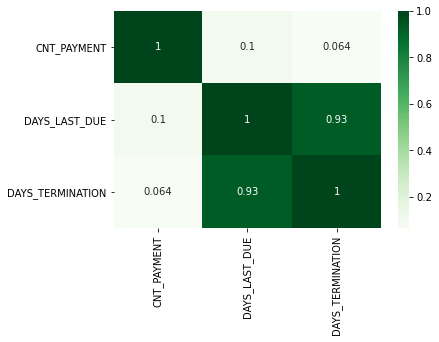

In [130]:
sns.heatmap(inp2[["CNT_PAYMENT","DAYS_LAST_DUE", "DAYS_TERMINATION"]].corr() ,annot=True, cmap="Greens")
plt.show()

Inference: Not a significant corelation except already above

#### Plot the correlation matrix of "AMT_CREDIT_x","AMT_CREDIT_y","CNT_PAYMENT"  in inp0 dataframe.

In [131]:
inp2[["AMT_CREDIT_x","AMT_CREDIT_y","CNT_PAYMENT"]].corr()

,AMT_CREDIT_x,AMT_CREDIT_y,CNT_PAYMENT
AMT_CREDIT_x,1.000000,0.116746,0.037726
AMT_CREDIT_y,0.116746,1.000000,0.675539
CNT_PAYMENT,0.037726,0.675539,1.000000


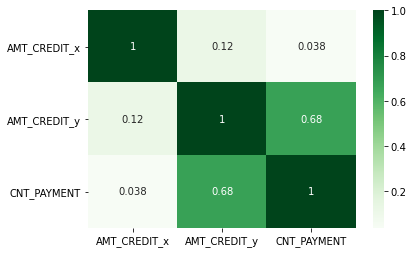

In [132]:
sns.heatmap(inp2[["AMT_CREDIT_x","AMT_CREDIT_y","CNT_PAYMENT"]].corr() ,annot=True, cmap="Greens")
plt.show()

Inference: Not a significant corelation except already above

#### Plot the correlationmatrix of "DAYS_FIRST_DRAWING" ,"DAYS_FIRST_DUE" ,"DAYS_LAST_DUE_1ST_VERSION" ,"DAYS_LAST_DUE" ,"DAYS_TERMINATION" and "CNT_PAYMENT"  in inp0 dataframe.

In [133]:
inp2[["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","CNT_PAYMENT"]].corr()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,CNT_PAYMENT
DAYS_FIRST_DRAWING,1.000000,0.004604,-0.809055,-0.254181,-0.396145,0.309294
DAYS_FIRST_DUE,0.004604,1.000000,0.502353,0.388354,0.313151,-0.203528
DAYS_LAST_DUE_1ST_VERSION,-0.809055,0.502353,1.000000,0.409928,0.484729,-0.383046
DAYS_LAST_DUE,-0.254181,0.388354,0.409928,1.000000,0.927535,0.099647
DAYS_TERMINATION,-0.396145,0.313151,0.484729,0.927535,1.000000,0.063686
CNT_PAYMENT,0.309294,-0.203528,-0.383046,0.099647,0.063686,1.000000


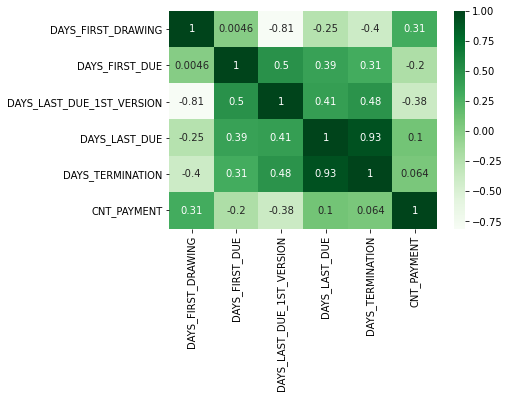

In [134]:
sns.heatmap(inp2[["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","CNT_PAYMENT"]].corr() ,annot=True, cmap="Greens")
plt.show()

Inference: Not a significant corelation except already above